<a href="https://colab.research.google.com/github/gyuminpk/Playground_solver/blob/main/Knight's_Tour_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 5x5 나이트 투어 (금지칸 2개)
N = 5

# 아래에 2개의 금지칸 입력 (i열 j행 - (i,j), i,j = 0 ~ 4)
forbidden = {(0, 0), (3, 2)}


In [10]:


moves = [
    (2, 1), (2, -1), (-2, 1), (-2, -1),
    (1, 2), (1, -2), (-1, 2), (-1, -2)
]

valid_cells = [(x, y) for x in range(N) for y in range(N)
               if (x, y) not in forbidden]

def is_valid(x, y, visited):
    return (
        0 <= x < N and
        0 <= y < N and
        (x, y) not in forbidden and
        (x, y) not in visited
    )

def dfs(path, visited):
    if len(path) == len(valid_cells):
        return path

    x, y = path[-1]
    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        if is_valid(nx, ny, visited):
            visited.add((nx, ny))
            result = dfs(path + [(nx, ny)], visited)
            if result:
                return result
            visited.remove((nx, ny))
    return None

# 시작점은 금지칸 제외 아무 곳이나 가능
for start in valid_cells:
    visited = {start}
    answer = dfs([start], visited)
    if answer:
        print("✅ 경로 발견!")
        print(answer)
        break



✅ 경로 발견!
[(4, 0), (2, 1), (4, 2), (3, 4), (1, 3), (0, 1), (2, 2), (3, 0), (1, 1), (0, 3), (2, 4), (4, 3), (3, 1), (1, 0), (0, 2), (1, 4), (3, 3), (4, 1), (2, 0), (1, 2), (0, 4), (2, 3), (4, 4)]


/tmp/ipython-input-4142756356.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  path_cmap = plt.cm.get_cmap('Greens', len(answer) + 1)


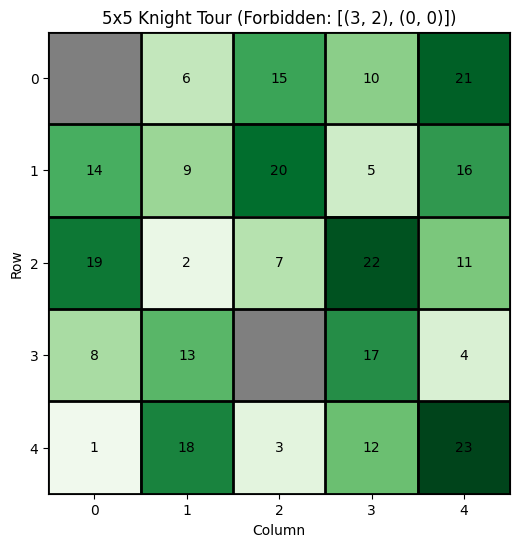

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create an N x N grid for visualization
# 0: unvisited valid, -1: forbidden, 1+: path order
board_viz = np.zeros((N, N), dtype=int)

# Mark forbidden cells
for r, c in forbidden:
    board_viz[r, c] = -1

# Mark path cells with their order
for i, (r, c) in enumerate(answer):
    board_viz[r, c] = i + 1

# Prepare colors for visualization
# Gray for forbidden, white for unvisited valid, green gradient for path
image_data = np.zeros((N, N, 3)) # RGB image

# Define base colors
gray_color = np.array([0.5, 0.5, 0.5])  # Gray for forbidden
white_color = np.array([1.0, 1.0, 1.0]) # White for unvisited valid

# Create a colormap for the path (shades of green)
path_cmap = plt.cm.get_cmap('Greens', len(answer) + 1)

for r in range(N):
    for c in range(N):
        if board_viz[r, c] == -1:
            image_data[r, c] = gray_color
        elif board_viz[r, c] == 0:
            image_data[r, c] = white_color
        else: # Path cell
            # Use path_cmap for green shades, starting from index 1 (value 1 maps to path_cmap[1])
            image_data[r, c] = path_cmap(board_viz[r, c])[:3]


plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.imshow(image_data, origin='upper')

# Add numbers to path cells
for i, (r, c) in enumerate(answer):
    ax.text(c, r, str(i + 1), ha='center', va='center', color='black', fontsize=10)

# Grid lines and labels
ax.set_xticks(np.arange(N))
ax.set_yticks(np.arange(N))
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_title(f'{N}x{N} Knight Tour (Forbidden: {list(forbidden)})')

# Draw grid lines
ax.set_xticks(np.arange(-0.5, N, 1), minor=True)
ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='minor', size=0)

plt.show()

# Task
Modify cell `j4SPBTZPa1Uz` to integrate `matplotlib.ginput()` for interactive selection of forbidden cells on a 5x5 grid. The `forbidden` set will be populated based on user clicks on the plot, after which the Knight's Tour algorithm will execute using these user-defined forbidden cells.

## Implement Interactive Forbidden Cell Selection

### Subtask:
Modify cell `j4SPBTZPa1Uz` to integrate `matplotlib.ginput()` for interactive selection of forbidden cells on a 5x5 grid. The `forbidden` set will be populated based on user clicks on the plot, after which the Knight's Tour algorithm will execute using these user-defined forbidden cells.


## Summary:

### Data Analysis Key Findings
No data analysis was performed in this step. This step focused on defining the next action to implement an interactive feature.

### Insights or Next Steps
*   The next step involves modifying an existing cell (`j4SPBTZPa1Uz`) to incorporate user interaction for defining forbidden cells in a Knight's Tour problem.
*   The implementation will use `matplotlib.ginput()` to allow users to click on a 5x5 grid, and these clicks will dynamically populate the set of forbidden cells for the Knight's Tour algorithm.
